In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [6]:
data = pd.read_csv("/Users/oliverla412/Desktop/Place_project/IBM_Learning/drug200.csv")
data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
X = data[['Age','Sex','BP','Cholesterol','Na_to_K']].values

In [94]:
c1 = data[data.columns].values

In [95]:
c1

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       ...,
       [52, 'M', 'NORMAL', 'HIGH', 9.894, 'drugX'],
       [23, 'M', 'NORMAL', 'NORMAL', 14.02, 'drugX'],
       [40, 'F', 'LOW', 'NORMAL', 11.349, 'drugX']], dtype=object)

In [97]:
#c1[:,0]

In [18]:
X[:,1][:5]

array(['F', 'M', 'M', 'F', 'F'], dtype=object)

In [19]:
X[:,2][:10]

array(['HIGH', 'LOW', 'LOW', 'NORMAL', 'LOW', 'NORMAL', 'NORMAL', 'LOW',
       'NORMAL', 'LOW'], dtype=object)

In [21]:
X[:,3][:10]

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL'], dtype=object)

In [22]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

### Converting the categorical data into numerical data using pandas.get_dummies() method

In [14]:
X[1:1]

array([], shape=(0, 5), dtype=object)

In [23]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3] = le_Chol.transform(X[:,3])
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [25]:
y = data['Drug']
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [26]:
y_unique = data['Drug'].unique()


In [27]:
y_unique

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### setting up the Decision Tree Algorithum

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [83]:
x_train.shape[0]

140

In [81]:
y_train.shape[0]

140

In [34]:
x_test.shape

(60, 5)

In [35]:
y_test.shape

(60,)

### Modeling

we will first create an instance of the __DecisionTreeClassifier__ called __DrugTrue__
Inside of the classifier, specifier criterion ="entropy" so we can see the information gain of each node.

In [36]:
drugTree = DecisionTreeClassifier(criterion="entropy",
                                  max_depth= 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next we will fit the data with the training feature matrix __x_train__
and training respose vector __y_train__

In [37]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

Let's make some prediction on the testing dataset and store it into a variable called __PredTree__

In [38]:
predTree = drugTree.predict(x_test)

you can print out __predTree__ and __y_test__ if you want to visually compre 
the prediction to the actual values.

In [40]:
print(predTree[:10])
print('--'*5)
print(y_test[:10])

['drugX' 'drugX' 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugB' 'drugX'
 'drugX']
----------
45     drugX
72     drugX
40     drugY
58     drugX
25     drugY
13     drugY
153    drugX
80     drugB
3      drugX
44     drugX
Name: Drug, dtype: object


### Evaluation of the model.

Next , let's import the __metrics__ from sklearn and check the accuracy of our model.

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt


In [42]:
print("DecisonTrees's accuracy: ",metrics.accuracy_score(y_test, predTree))

DecisonTrees's accuracy:  0.9666666666666667


__Accuracy classification score__ computes accuracy: the set of labels predicted for a sample must exactly match the 
the corresponding of labels __y_true__ 

In multilabel classification, the function return the subset accuracy. if the entire set
of predicted labels for sample strictly with the true set of labels, then
the subset accuracy is : 1.0;
otherwise it is : 0.0

### Visualization

In [54]:
#!pip install six
!pip install pydotplus

In [57]:
import six
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = 'drugTree.pnp'
featureNames = data[0:5]
targetNames = data['Drug'].unique().tolist()
out = tree.export_graphviz(drugTree,
                         feature_names=featureNames,
                          out_file = dot_data,
                          class_names= np.unique(y_train),
                          filled= True,
                          special_characters=True,
                          rotate= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue)
graph.write_png(out)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')


In [77]:
featureNames = list(data.columns[:5])
targetNames = data['Drug'].unique().tolist()

In [78]:
featureNames 

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [79]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus
# from time import sleep
#sleep(5)
#print('I love you darling')

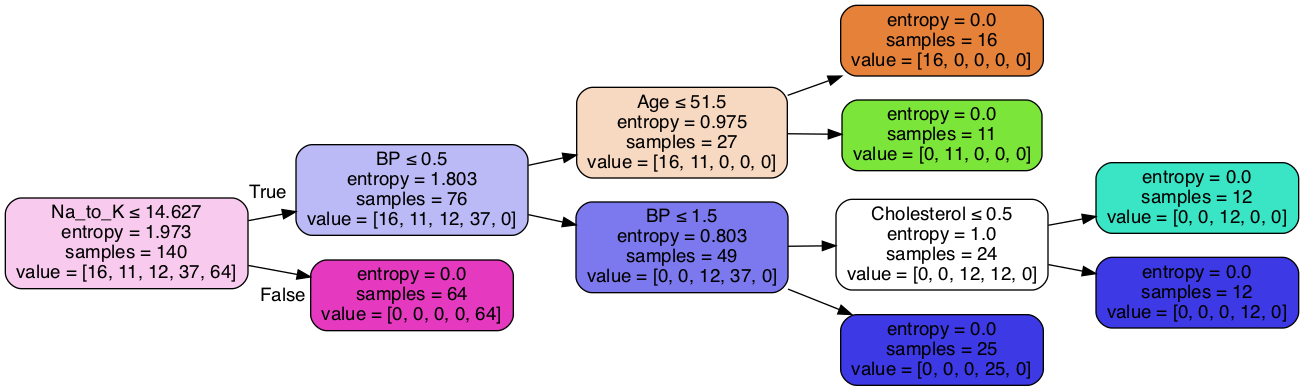

In [80]:
# Create a dot_file which store the tree structure

dot_data = export_graphviz(drugTree,
                          feature_names=featureNames,
                          rounded=True,
                          filled= True,
                          rotate=True,
                          special_characters=True)
# Draw the graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('drugTree.png')
Image(graph.create_png())